In [12]:
#Basic libraries used
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Plotting tools
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
sns.set_theme()
#standardize
from sklearn.preprocessing import StandardScaler
#k-means
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
#Hierarchical 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
#Dimension Reduction
from sklearn.decomposition import PCA #for PCA
from sklearn.manifold import MDS #for MDS


In [2]:
#import csv into pandas dataframe
df=pd.read_csv('HW3.csv')
df.head()

,Element,atomic_number,atomic_radius_rahm,atomic_volume,atomic_weight,boiling_point,c6_gb,covalent_radius_cordero,covalent_radius_pyykko,density,...,num_p_valence,num_s_unfilled,num_s_valence,period,thermal_conductivity,vdw_radius,vdw_radius_alvarez,vdw_radius_mm3,vdw_radius_uff,Polarizability
0,H,1,154,14.1,1.008000,20.280,6.51,31,32,0.0708,...,0,1,1,1,0.1805,110,120,162,288.6,0.666793
1,He,2,134,31.8,4.002602,4.216,1.47,28,46,0.1470,...,0,0,2,1,0.1513,140,143,153,236.2,0.205052
2,Li,3,220,13.1,6.940000,1118.150,1410.00,128,133,0.5340,...,0,1,1,2,85.0000,182,212,255,245.1,24.330000
3,Be,4,219,5.0,9.012183,3243.000,214.00,96,102,1.8480,...,0,0,2,2,190.0000,153,198,223,274.5,5.600000
4,B,5,205,4.6,10.810000,3931.000,99.20,84,85,2.3400,...,1,0,2,2,27.0000,192,191,215,408.3,3.030000


In [3]:
#normalise data
dfdata=df.loc[:,'atomic_number':"Polarizability"]
norm=StandardScaler().fit_transform(dfdata)
dfnorm=pd.DataFrame(norm)
dfnorm.to_csv('HW3NORM.csv')

In [4]:
#Apply metric MDS
mds=MDS(2,random_state=0)
data_2d=mds.fit_transform(norm)


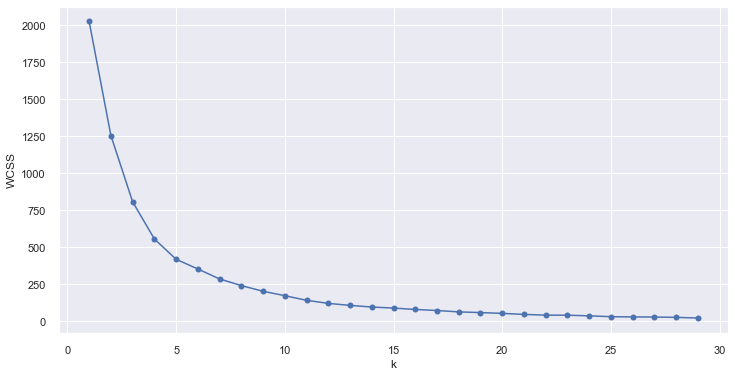

In [14]:
#figuring out optimum k
WCSS=[]
n=30
for cluster in range(1,n):
    kmeans=KMeans(n_clusters=cluster,init='k-means++',random_state=10)
    kmeans.fit(data_2d)
    WCSS.append(kmeans.inertia_)

# k vs WCSS
frame=pd.DataFrame({'Cluster':range(1,n),'WCSS':WCSS})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['WCSS'], marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.savefig('k_vs_WCSS.png',dpi=600)



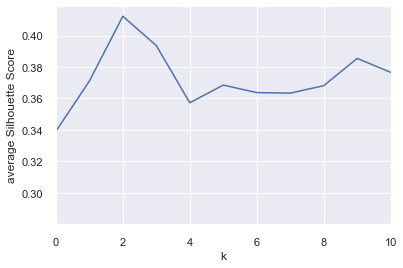

In [28]:
#Silhouette Score
sil=[]
for cluster in range(2,n):
    kmeans=KMeans(n_clusters=cluster,init='k-means++',random_state=10)
    kmeans.fit(data_2d)
    sil1=silhouette_score(data_2d,kmeans.labels_,metric='euclidean')
    sil.append(sil1)

plt.plot(sil)
plt.xlim([0,10])
plt.xlabel('k')
plt.ylabel('average Silhouette Score')
plt.savefig('sil',dpi=600)
  

In [15]:
kmeans = KMeans(n_clusters=5,n_init=50,random_state=10,algorithm='full', init='random')
kmeans.fit(data_2d)
#y=kmeans.fit_predict(data_2d)
#print(y)
z=kmeans.labels_


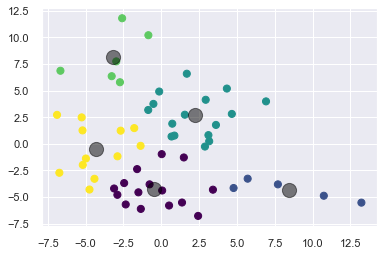

In [16]:
#dfpca=pd.DataFrame(newdata)
#label=df['Class_Label']
#dfpca['Class_Label']=
#dfpca['Class_Label']=dfpca['Class_Label'].apply(str)
plt.scatter(data_2d[:,0],data_2d[:,1], c=z,s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.savefig('k_5',dpi=600)

In [17]:
#Place the MDS columns into a Dataframe
dfdata_2d=pd.DataFrame(index=df['Element'],data=data_2d)
dfdata_2d.head()

,0,1
Element,,
H,-6.661679,6.863213
He,-2.583674,11.798825
Li,3.417533,-4.315589
Be,-5.202437,1.258129
B,-5.258327,2.480673


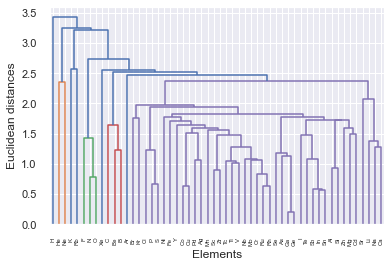

In [18]:
#Hierarchy Cluster wa



dendrogram = sch.dendrogram(sch.linkage(dfdata_2d, method  = "single"),labels=list(dfdata_2d.index))
plt.xlabel('Elements')
plt.ylabel('Euclidean distances')
plt.axhline(y=35)
plt.axhline(y=25)
plt.axhline(y=20)
plt.axhline(y=15)
plt.savefig('dendo_single',dpi=600)

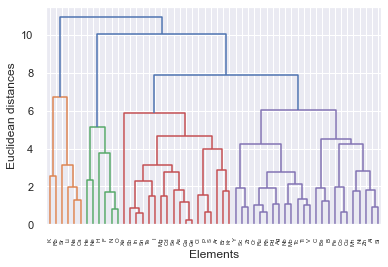

In [19]:
dendrogram = sch.dendrogram(sch.linkage(dfdata_2d, method  = "average"),labels=list(dfdata_2d.index))
plt.xlabel('Elements')
plt.ylabel('Euclidean distances')
plt.savefig('dendo_average',dpi=600)

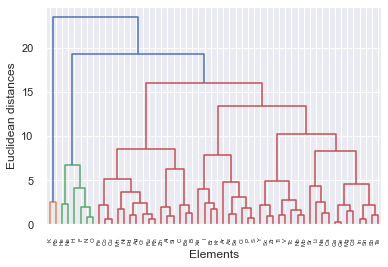

In [20]:
dendrogram = sch.dendrogram(sch.linkage(dfdata_2d, method  = "complete"),labels=list(dfdata_2d.index))
plt.xlabel('Elements')
plt.ylabel('Euclidean distances')
plt.savefig('dendo_complete',dpi=600)